In [2]:
#import the needed packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# read in app_usage data into vpn_df
vpn_df= pd.read_csv("app_usage.csv")
vpn_df.head(5)


,CRM,CloudDrive,ERP,Expenses,HR1,HR2,ITOps,OTHER,Recruiting,Webmail,RemoteAccess
0,49,99,17,38,0,0,18,144,33,141,283
1,107,148,28,54,0,0,38,188,30,213,430
2,639,796,221,216,0,0,133,1175,297,579,732
3,653,767,203,191,0,0,139,1475,308,549,738
4,670,738,196,140,0,0,128,1111,305,678,781


In [4]:
#oberve the data
#RemoteAccess is the target, we will build a model that 
#takes all other columns as X to predict remote VPN usage

#look at the shape of the dataframe
print(vpn_df.shape)

#look at the column names
print(vpn_df.columns)

#show the first 5 records
print(vpn_df.head(5))

(91, 11)
Index(['CRM', 'CloudDrive', 'ERP', 'Expenses', 'HR1', 'HR2', 'ITOps', 'OTHER',
       'Recruiting', 'Webmail', 'RemoteAccess'],
      dtype='object')
   CRM  CloudDrive  ERP  Expenses  HR1  HR2  ITOps  OTHER  Recruiting  \
0   49          99   17        38    0    0     18    144          33   
1  107         148   28        54    0    0     38    188          30   
2  639         796  221       216    0    0    133   1175         297   
3  653         767  203       191    0    0    139   1475         308   
4  670         738  196       140    0    0    128   1111         305   

   Webmail  RemoteAccess  
0      141           283  
1      213           430  
2      579           732  
3      549           738  
4      678           781  


[Text(0, 0.5, 'Numbers'), Text(0.5, 0, 'VPN Access')]

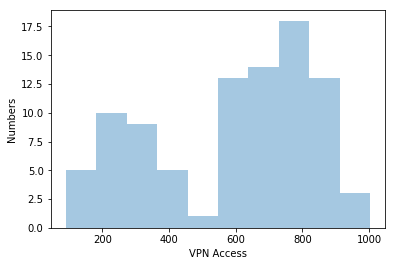

In [5]:
# Visualizing the distribtuion of Remote VPN Access
ax = sns.distplot(vpn_df['RemoteAccess'], bins =10, kde = False)
ax.set(xlabel="VPN Access", ylabel="Numbers")

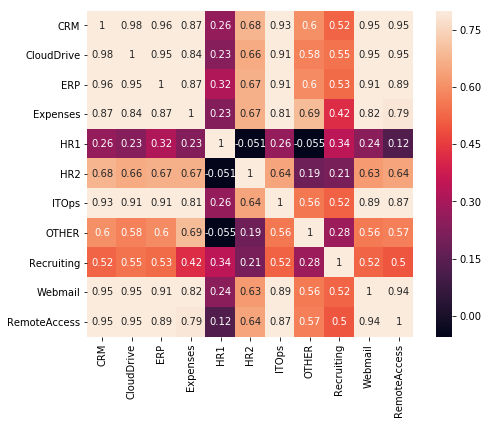

In [6]:
# Visualize the correlation heatmap
corrmat = vpn_df.corr()
f, ax = plt.subplots(figsize=(8,6))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot= True)
#f.tight_layout()

### Target variable has continuous distribution so this is Linear regression problem therefore using Linear Regression model would be a better choice

In [7]:
from sklearn import linear_model

In [8]:
#The function takes X, y and retrun the trained model and R squared
def train_model(X,y):
    model = linear_model.LinearRegression()
    model.fit(X, y)
    R_2 = model.score(X,y)
    return model, R_2
#create a function to calculate Adjusted R_square
# n is the number of sample, p is the number features
def cal_adjusted_R(R_2, p, n):
    R_adjusted = R_2-(1-R_2)*(p/(n-p-1))
    return R_adjusted

In [9]:
#R_2_array stores the R squared of all the features
R_2_array = np.array([])

#Calcuate the R_squared 
for col_name in vpn_df.columns:
    if col_name == 'RemoteAccess':
        continue
    else:   
        #extract the feature column from dataset
        X_feature = vpn_df[[col_name]]
        
        #Target variable
        target = vpn_df[['RemoteAccess']]
        
        #call the train_model with X, y
        model, R_2 = train_model(X_feature, target)
        
        #print R Squared
        print(col_name, R_2)
        
        #Save the R Squared value to an array
        R_2_array = np.append(R_2_array, R_2)        

################################################################
## sorted_R_2_index stores the index numbers of R_2_array   ####
## in descending order of the R_2 values                    ####        
sorted_R_2_index = np.argsort(R_2_array)[::-1]       
#################################################################


#print out the sorted indexes 
print("The order of index numbers are : \t", sorted_R_2_index)

CRM 0.9030603942302714
CloudDrive 0.8932567722424455
ERP 0.7904301126742891
Expenses 0.6232665636003503
HR1 0.015308027253735923
HR2 0.41428585591006056
ITOps 0.7566204951691912
OTHER 0.3268756160241405
Recruiting 0.24953322751414383
Webmail 0.8847819743305698
The order of index numbers are : 	 [0 1 9 2 6 3 5 7 8 4]


In [10]:
#gradually build up our model and add R squared and adjusted R to the output

for i in range(len(sorted_R_2_index)):
    
    #the selected_features should be the top i most associated features
    selected_features = []
    
    #take the top 1 to ith features as X
    for j in range(i+1):
        
            #append a new column based on the sorted R value
            #take your time to digist this line
            selected_features.append(vpn_df.columns[sorted_R_2_index[j]])
            
    #verify we got the right features
    print(selected_features)
    
    # X
    X_feature = vpn_df[selected_features]
    
    # y
    target = vpn_df[['RemoteAccess']]
    
    # train the model
    model, R_2 = train_model(X_feature, target)
    
    #calculate adjusted R
    R_adjusted = cal_adjusted_R(R_2, i+1, vpn_df.shape[0])
    
    #print the output
    print("R2: ", R_2, "\t Ajusted R2: ", R_adjusted, "\n")

['CRM']
R2:  0.9030603942302714 	 Ajusted R2:  0.901971185176679 

['CRM', 'CloudDrive']
R2:  0.9074773125587101 	 Ajusted R2:  0.9053745242077718 

['CRM', 'CloudDrive', 'Webmail']
R2:  0.9169720723523399 	 Ajusted R2:  0.9141090403644896 

['CRM', 'CloudDrive', 'Webmail', 'ERP']
R2:  0.9243104820063341 	 Ajusted R2:  0.9207900393089543 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps']
R2:  0.9245040709947892 	 Ajusted R2:  0.9200631339944826 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses']
R2:  0.9261180813990765 	 Ajusted R2:  0.9208408014990105 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses', 'HR2']
R2:  0.9268374090661093 	 Ajusted R2:  0.9206670700716848 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses', 'HR2', 'OTHER']
R2:  0.9303318238786104 	 Ajusted R2:  0.9235349286472553 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses', 'HR2', 'OTHER', 'Recruiting']
R2:  0.9305073579887443 	 Ajusted R2:  0.922785953320827 

['CRM', 'Clou

In [11]:
#let's build the model with all the features

y = vpn_df['RemoteAccess']
X = vpn_df.drop('RemoteAccess', 1)

from sklearn import linear_model

#create a linear regression model from linear_model package 
model=linear_model.LinearRegression()

#Train the model with our data (X, y)
model.fit(X,y)

#Display the parameters
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

#use R squared to see how much variation is explained by the trained model
print('R_squared: \n', model.score(X,y))

Intercept: 
 168.76868273498098
Coefficients: 
 [ 0.78030166  0.02552479 -0.3614915  -0.22380617 -0.14305536 -0.02601244
 -0.14498212 -0.01503002  0.02986555  0.32726658]
R_squared: 
 0.9392847759700534


### According to article of abbottanalytics I will remove features CRM, CloudDrive, ERP, HR1, HR2, Other and Recruiting.
### CRM , CloudDrive and ERP are highly correlated with each other and also with features like ITops and Webmail, so it makes sense to remove them
### HR1, HR2, Other and Recruiting are less correlated with target feature i.e. RemoteAccess, so we can remove these features as well.

In [12]:
#Removing features as explained above.
X = vpn_df.drop(['HR1','HR2','OTHER','Recruiting','CRM','CloudDrive','ERP'],axis=1)

In [19]:
# 2. we use Lasso to further penalize models with more features
from sklearn.linear_model import Lasso

# in Lasso, the score is still R squared 
best_score = []

# Lasso has a parameter alpha used to adjust the level of penalizing the 
# number of features. A bigger alpha will produce less features. 
# We initiate the best alpha to 0 
best_alpha = []

# let's fine tune alpha to find the model we need 
for alpha in np.linspace(1,0.2, 1000):
    
    #create a linear regression (Lasso) model from linear_model package 
    model=Lasso(alpha=alpha,normalize=True, max_iter=1e5)

    #Train the model with our data (X, y)
    model.fit(X,y)
    best_score.append(model.score(X,y))
    best_alpha.append(alpha)
            
best_of_R_score = max(best_score)
index_of_best =  best_score.index(best_of_R_score)
print("The best R of my 3-feature model is:\t\t", best_of_R_score)
print("The alpha I used in Lasso to find my model is: \t", best_alpha[index_of_best])

    #use R squared to see how much variation is explained by the trained model
    #print('R_squared: \n', model.score(X,y))

The best R of my 3-feature model is:		 0.9999377924151738
The alpha I used in Lasso to find my model is: 	 0.2


In [20]:
##### Write your summary here
print("My summary: According to article of abbottanalytics I will remove features CRM, CloudDrive, ERP, HR1, HR2, Other and Recruiting.CRM , CloudDrive and ERP are highly correlated with each other and also with features like ITops and Webmail, so it makes sense to remove them HR1, HR2, Other and Recruiting are less correlated with target feature i.e. RemoteAccess, so we can remove these features as well.         ")
print("the 3 features in my model are: Expenses, ITOps, Webmail  ")

My summary: According to article of abbottanalytics I will remove features CRM, CloudDrive, ERP, HR1, HR2, Other and Recruiting.CRM , CloudDrive and ERP are highly correlated with each other and also with features like ITops and Webmail, so it makes sense to remove them HR1, HR2, Other and Recruiting are less correlated with target feature i.e. RemoteAccess, so we can remove these features as well.         
the 3 features in my model are: Expenses, ITOps, Webmail  
